In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("housing_data.csv")

# Feature Engineering
df['price_per_sqft'] = df['price'] / df['area']

# Encode categorical variable (location)
df = pd.get_dummies(df, columns=['location'], drop_first=True)

print(df.head())


   area  bedrooms  age   price  price_per_sqft  location_Downtown  \
0  1500         3    5  250000      166.666667               True   
1  2000         4   10  300000      150.000000              False   
2  1800         3    3  350000      194.444444              False   
3  1200         2   15  180000      150.000000              False   
4  2200         4    8  400000      181.818182               True   

   location_Suburb  
0            False  
1             True  
2            False  
3             True  
4            False  


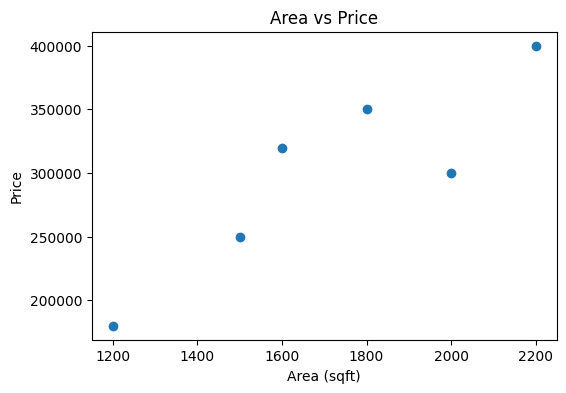

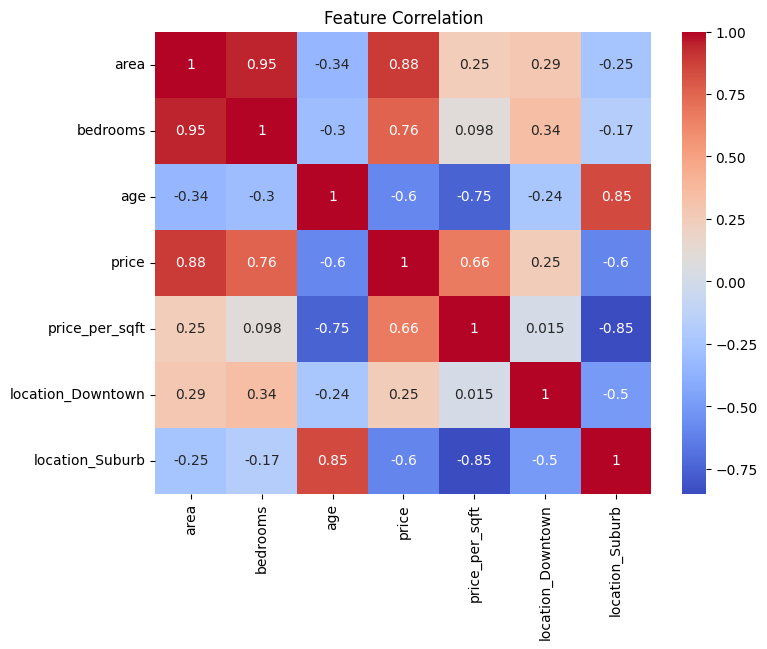

In [2]:
# Scatter plots
plt.figure(figsize=(6,4))
plt.scatter(df['area'], df['price'])
plt.title('Area vs Price')
plt.xlabel('Area (sqft)')
plt.ylabel('Price')
plt.show()

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# Prepare data
X = df.drop('price', axis=1)
y = df['price']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models
lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)

lr.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Evaluate
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)

print("Linear Regression R2:", r2_score(y_test, y_pred_lr))
print("Random Forest R2:", r2_score(y_test, y_pred_rf))


Linear Regression R2: 0.4786095407224813
Random Forest R2: -4.81972


In [4]:
import joblib

# Save best model
joblib.dump(rf, 'house_price_model.pkl')
print("Model saved successfully!")


Model saved successfully!
